## Задача 3

### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
### Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./kc_house_data.csv', encoding='1251', sep=',')
df.head(5)
data = df['price'].value_counts()
data

price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: count, Length: 4028, dtype: int64

In [2]:
data = df.groupby('price')['bedrooms'].agg(count='count').reset_index().sort_values(by='price')
data.head()

,price,count
0,75000.0,1
1,78000.0,1
2,80000.0,1
3,81000.0,1
4,82000.0,1


Text(0, 0.5, 'bathrooms')

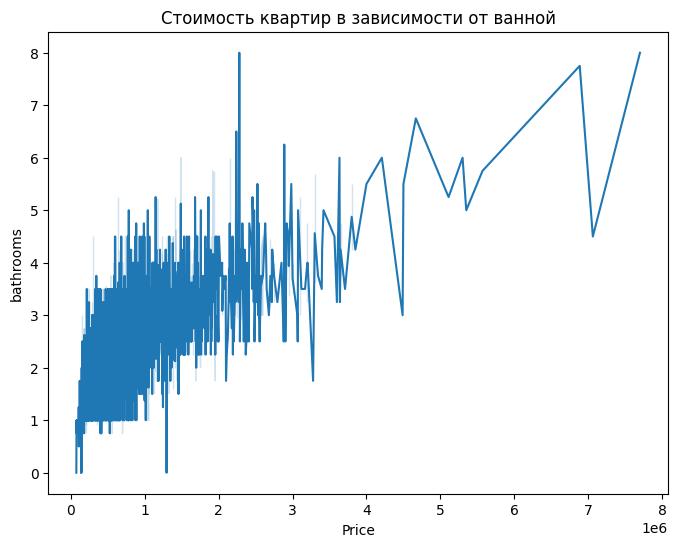

In [13]:
plt.figure(figsize=(8, 6))

sns.lineplot(x=df['price'], y=df['bathrooms'])
plt.title('Стоимость квартир в зависимости от ванной')
plt.xlabel('Price')
plt.ylabel('bathrooms')

### зависимость стоимости домов от наличия набережной

AttributeError: Text.set() got an unexpected keyword argument 'ratation'

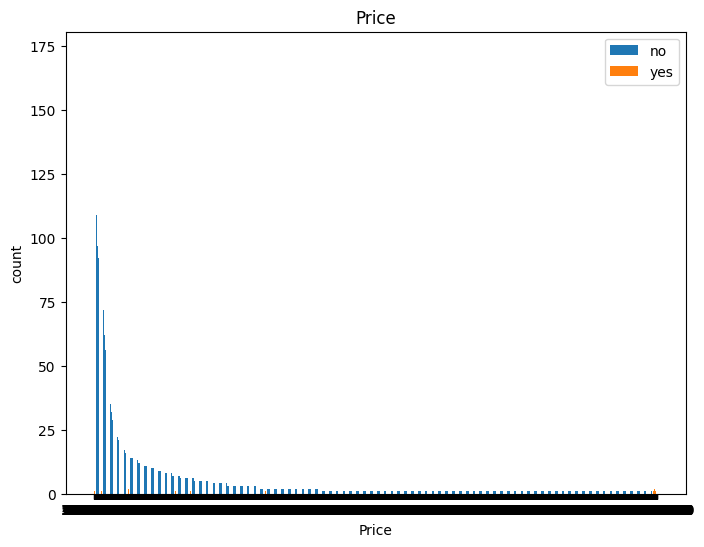

In [10]:
data = pd.crosstab(df['price'], df['waterfront']).reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0:'no', 1: 'yes'}, inplace=True)

plt.figure(figsize=(8, 6))
n_ticks = np.arange(len(data['no']))
offset = 0.2
w = 0.4

plt.bar(n_ticks-offset, data['no'], width=w)
plt.bar(n_ticks+offset, data['yes'], width=w)

plt.title('Price')
plt.xlabel('Price')
plt.ylabel('count')
plt.legend(['no', 'yes'])
plt.xticks(n_ticks, data['price'], ratation=30)

### зависимость стоимости дома от кол-ва спален

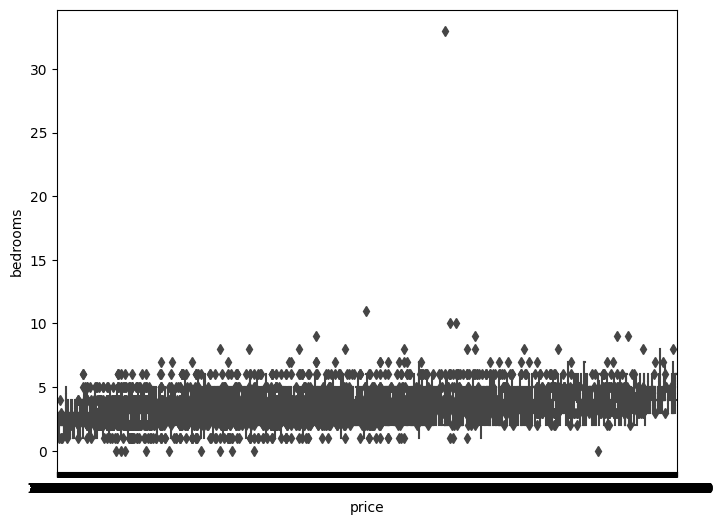

In [11]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=df['price'], y=df['bedrooms']);

Выводы:
- больше всего квартир с жилой площадью в районе 2000кв.м.
- наибольшее кол-во домов построено после 2000го года.
- с видом на набережную очень мало домов и они дороже.
- в основном построены одно и двухэтажные дома.
- состояние домов при продаже средннее либо выше среднего.
- чем больше ванных комнат в доме, тем больше цена дома.
- 